# 1. Data Analysis

In [1]:
from utils import load_df, save_df, analizes_df, data_cleaning, winsorize_df, encode_onehot, ordinal_encode
from eda_plots import graph_pipe_line
import pandas as pd
import os

df = load_df(os.path.join('..', 'data_analysis', 'datasets', 'raw', 'default of credit card clients.xls'))

In [2]:
# Select the row as index for better understanding.
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)
df.set_index(df.columns[0], inplace=True)

numeric_columns=['LIMIT_BAL','AGE',
                 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 
                ]
target = ['default payment next month']
categorical_columns = ['SEX','EDUCATION','MARRIAGE']

df = encode_onehot(df,categorical_columns, numeric_columns+target)
pay_order=[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
for pay in numeric_columns[2:8]:
    df = ordinal_encode(df, pay_order, pay)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df['default payment next month'] = df[target].astype(bool)

In [3]:
analizes_df(df)

Dataframe Shape:  (30000, 34)

 Head:
   SEX_1 SEX_2 EDUCATION_0 EDUCATION_1 EDUCATION_2 EDUCATION_3 EDUCATION_4  \
0   0.0   1.0         0.0         0.0         1.0         0.0         0.0   
1   0.0   1.0         0.0         0.0         1.0         0.0         0.0   
2   0.0   1.0         0.0         0.0         1.0         0.0         0.0   
3   0.0   1.0         0.0         0.0         1.0         0.0         0.0   
4   1.0   0.0         0.0         0.0         1.0         0.0         0.0   

  EDUCATION_5 EDUCATION_6 MARRIAGE_0  ... BILL_AMT4 BILL_AMT5 BILL_AMT6  \
0         0.0         0.0        0.0  ...         0         0         0   
1         0.0         0.0        0.0  ...      3272      3455      3261   
2         0.0         0.0        0.0  ...     14331     14948     15549   
3         0.0         0.0        0.0  ...     28314     28959     29547   
4         0.0         0.0        0.0  ...     20940     19146     19131   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_

# 2. Data Cleaning

Data cleaned: Removed NaN Values and 35 duplicates.


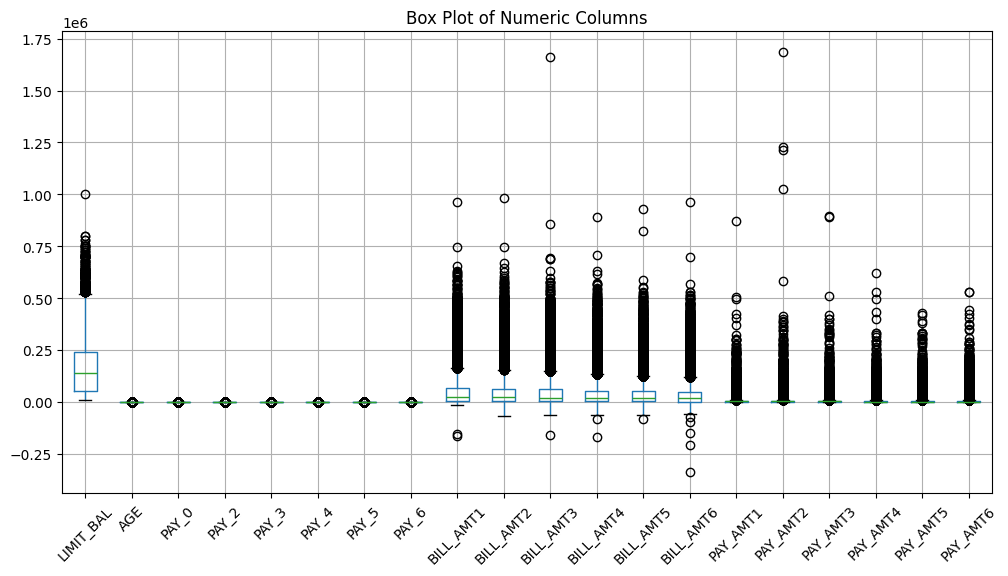

Dataset saved successfully at ../data_analysis/datasets/processed/credit_card_cleaned_without_pay_bill_payamt.csv.
Dataset saved successfully at ../data_analysis/datasets/processed/credit_card_cleaned.csv.


In [4]:
df_cleaned = data_cleaning(df)

# Feature ingineering: Mean columns

df_cleaned['BILL_MEAN'] = df_cleaned[numeric_columns[8:14]].mean(axis=1)
df_cleaned['PAY_AMT_MEAN'] = df_cleaned[numeric_columns[14:20]].mean(axis=1)
numeric_columns.extend(['BILL_MEAN','PAY_AMT_MEAN'])

df_cleaned_without_pay_bill_payamt = pd.DataFrame(df_cleaned).drop(df_cleaned[numeric_columns[2:20]],axis=1)
save_df(df_cleaned_without_pay_bill_payamt, 'credit_card_cleaned_without_pay_bill_payamt.csv')
save_df(df_cleaned,'credit_card_cleaned.csv')

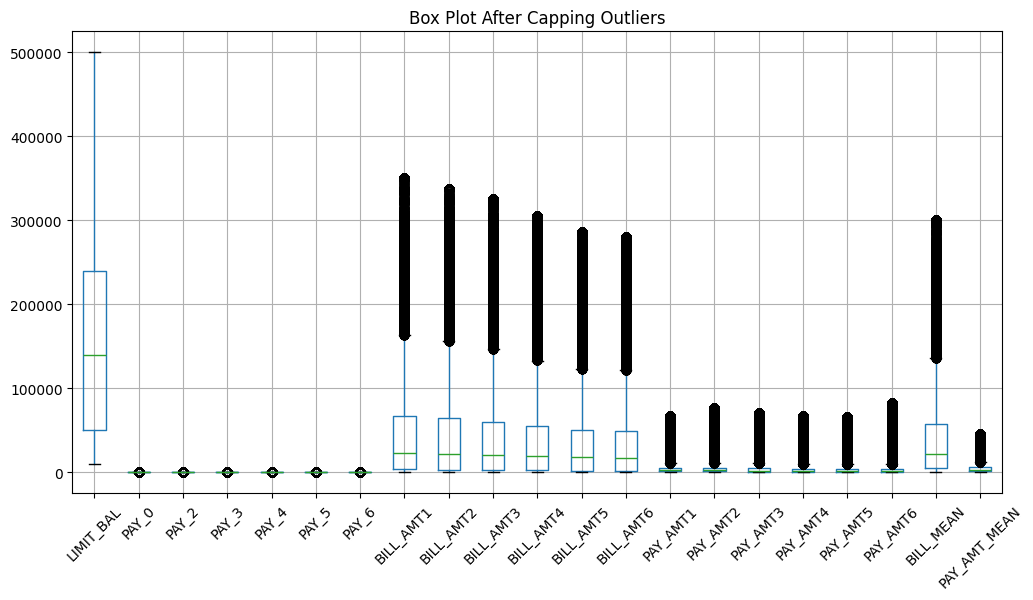

Dataset saved successfully at ../data_analysis/datasets/processed/credit_card_cleaned_outliers.csv.
Dataset saved successfully at ../data_analysis/datasets/processed/credit_card_cleaned_without_outliers_pay_bill_payamt.csv.


In [5]:
df_cleaned = winsorize_df(df_cleaned,numeric_columns[:1]+numeric_columns[2:])
save_df(df_cleaned,'credit_card_cleaned_outliers.csv')
df_cleaned_without_pay_bill_payamt = pd.DataFrame(df_cleaned).drop(numeric_columns[2:20], axis=1)
save_df(df_cleaned_without_pay_bill_payamt, 'credit_card_cleaned_without_outliers_pay_bill_payamt.csv')

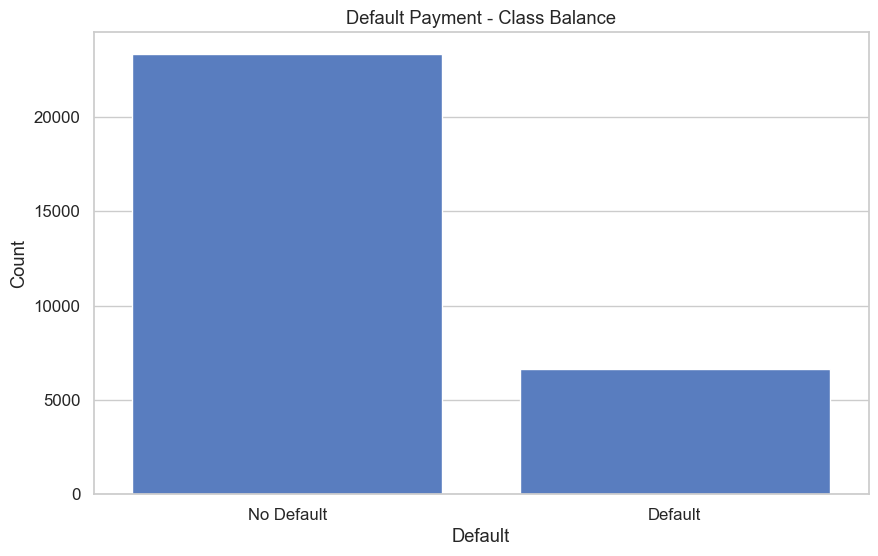

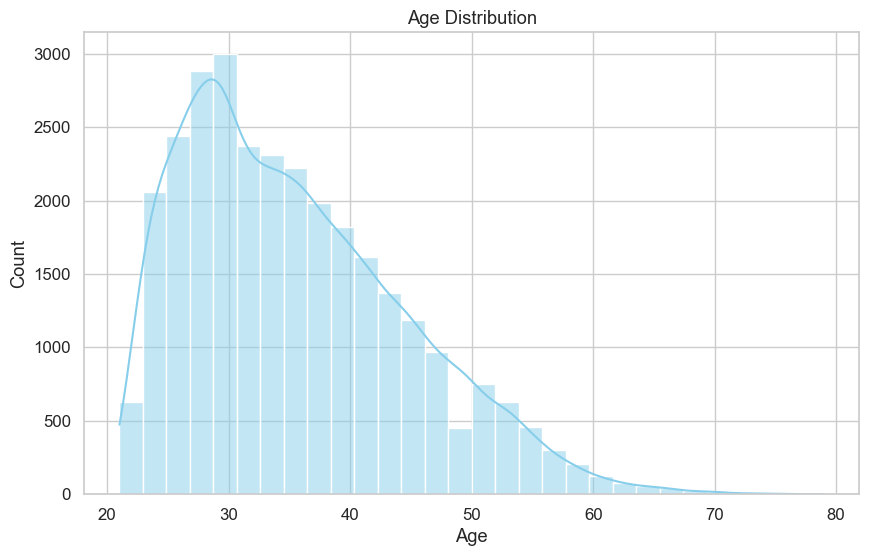

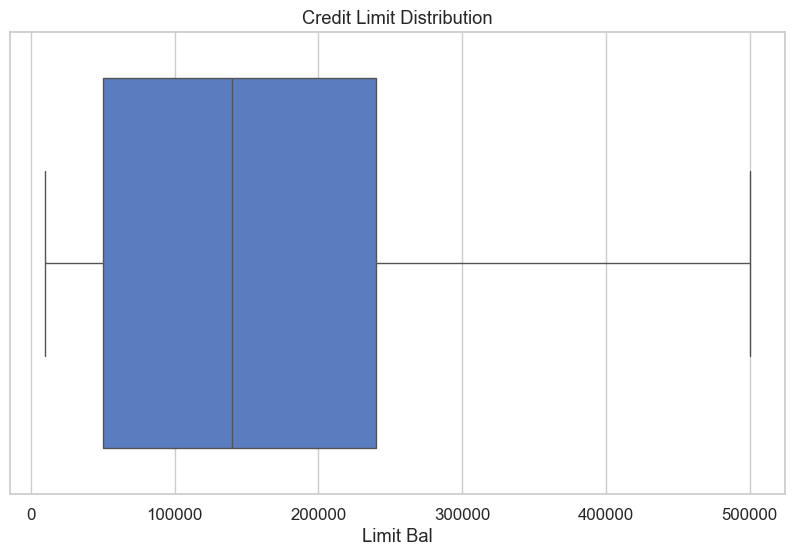

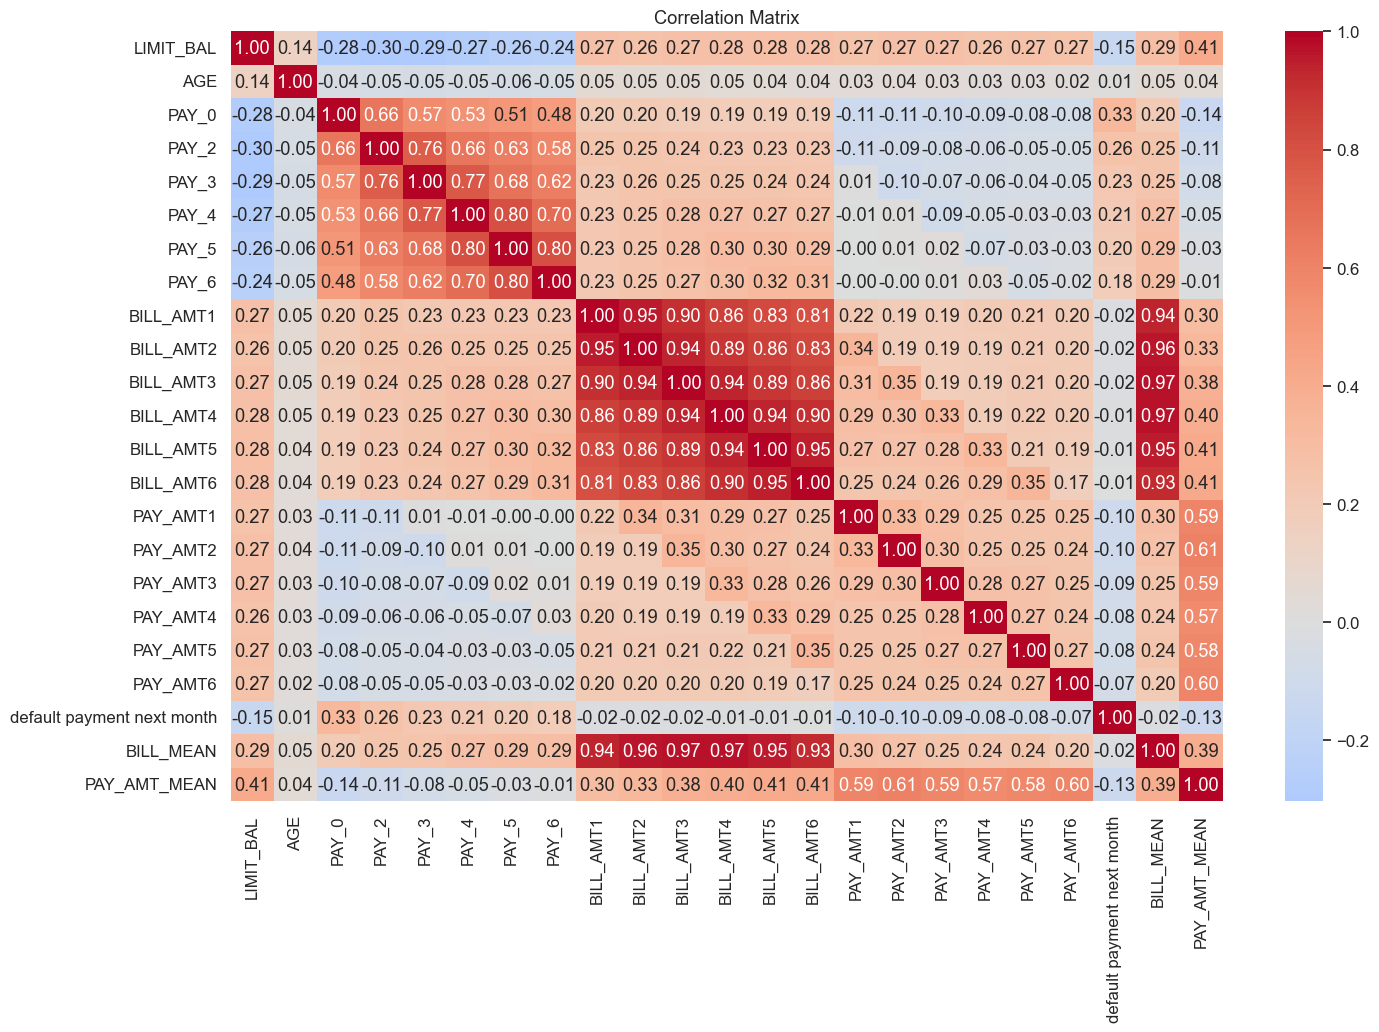

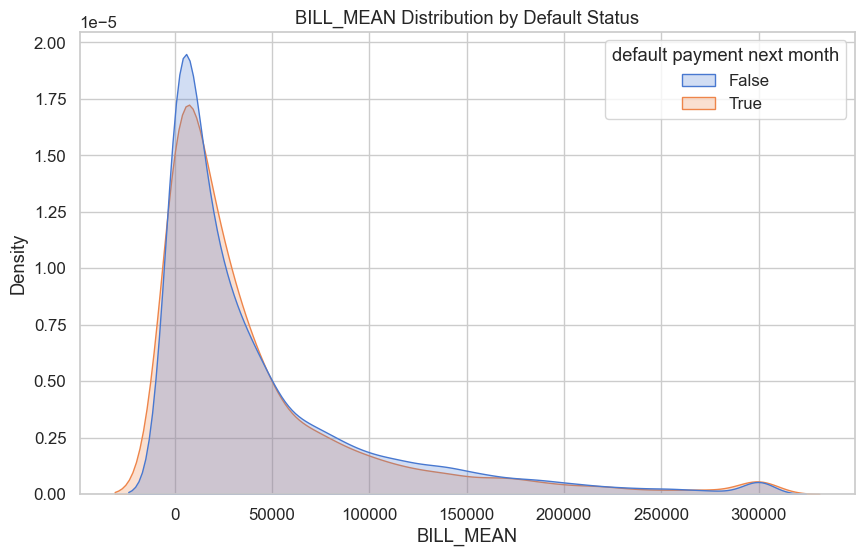

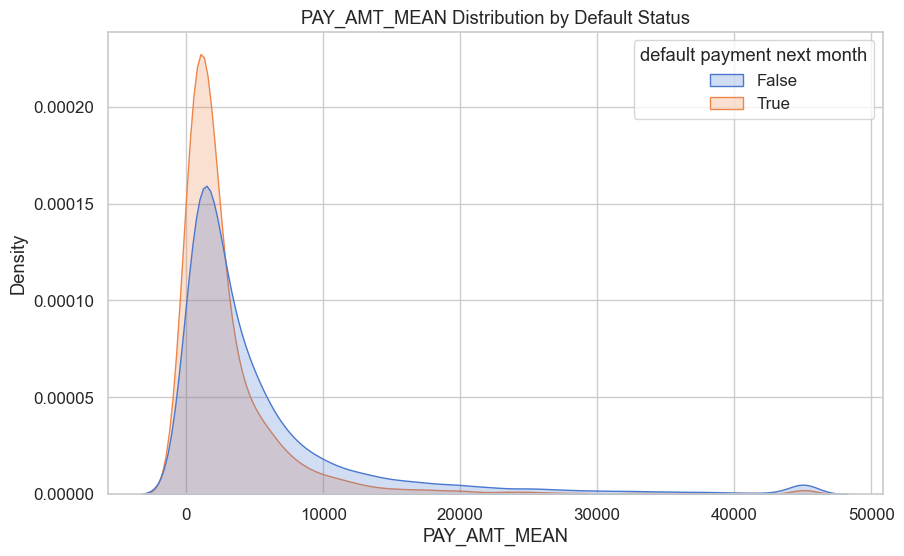

In [6]:
graph_pipe_line(df_cleaned)